In [ ]:
%matplotlib

import numpy as np
import matplotlib.pyplot as plt

Using matplotlib backend: module://matplotlib_inline.backend_inline


# Neural Network

## What is a *Neuron* (artificial)

> **disclaimer**: I'm no neurologist. This explanation below is only based on online research.

An **artificial neuron** works *similarly* to a **biological neuron** in the way it processes information.

In a brain (like yours), a **biological neuron** receives **electrical signals** from others, processes them, and sends an output signal.

An **artificial neuron** contrary to biological ones, follows these steps:
1. **Takes inputs** (usually numbers between 0 and 1).
2. **Multiplies** each by a corresponding **weight** (representing the importance of that input).
3. **Adds a bias**, which shifts the result up or down.
4. **Applies an activation function**, which normalizes or squashes the output (commonly: **sigmoid**, **ReLU**, etc.).
5. **Returns the final output**, often a value between 0 and 1. 

---

##  Vocabulary / Key Components

| Term     | Meaning |
|----------|---------|
| **inputs**  | List of input values (e.g., 8-bit binary numbers like `01001010`) |
| **weights** | Values associated with each input, controlling how much influence each input has |
| **bias**    | A constant added to the weighted sum to adjust the output |
| **activation function** | A function like `sigmoid` that transforms the output into a bounded range |

---

## Minimal Neuron Implementation

### Step 1 – Initialization

In [ ]:
import random

# neuron class 1
class Neuron:
    """
    z                   : linear combination of inputs and weights plus bias (pre-activation)
    y                   : output of the activation function (sigmoid(z))
    w                   : list of weights, one for each input
    """
    def __init__(self, isize):  
        # number of inputs to this neuron
        self.isize = isize
        # importance to each input
        self.weight = [random.uniform(-1, 1) for _ in range(self.isize)]
        # importance of the neuron
        self.bias = random.uniform(-1, 1)

On their own, you can't do much yet, but they form a good starting point to illustrate how a neuron behaves: 
it takes a input size as parameter, generates a corresponding list of random weights, and assigns a random bias.

## Step 2 – Activation Functions

In [ ]:
# transform all numbers between 0 and 1
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# sigmoid's derivation
def sigmoid_deriv(x): 
    y: float = sigmoid(x)
    return y * (1 - y)

These functions are called activation functions. Their goal is to transform any raw values (which can be any number) into a more reasonable range, usually between 0 and 1. The most well-known ones are:
- sigmoid   
- ReLU (Rectified Linear Unit)
- Tanh

### Sigmoid Graphical Representation

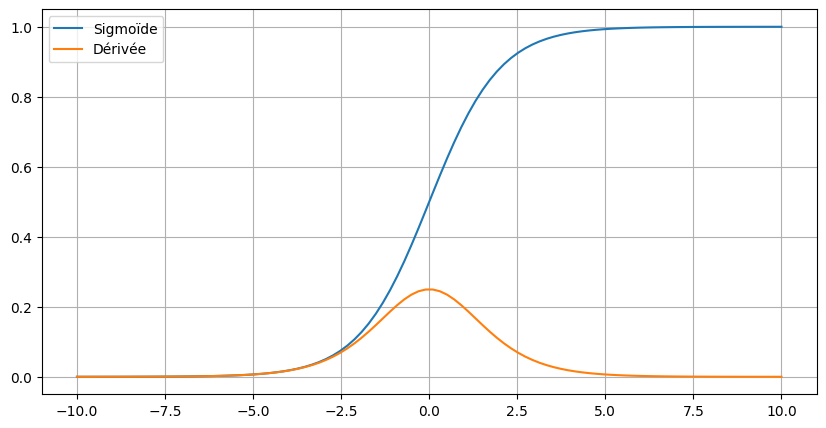

In [ ]:
x = np.linspace(-10, 10, 100)

y = sigmoid(x)
dy = sigmoid_deriv(x)

plt.figure(figsize=(10, 5))
plt.plot(x, y, label="Sigmoïde")
plt.plot(x, dy, label="Dérivée")
plt.legend()
plt.grid(True)

plt.show()

## Step 3 - Forward Pass Function

In [16]:
import random

# neuron class 2
class Neuron:
    """
    z                   : linear combination of inputs and weights plus bias (pre-activation)
    y                   : output of the activation function (sigmoid(z))
    w                   : list of weights, one for each input
    """
    def __init__(self, isize):
        # number of inputs to this neuron
        self.isize = isize
        # importance to each input
        self.weight = [random.uniform(-1, 1) for _ in range(self.isize)]
        # importance of the neuron
        self.bias = random.uniform(-1, 1)

    def forward(self, x, activate=True):
            """
            x               : list of input values to the neuron
            """
            # computes the weighted sum of inputs and add the bias
            self.z = sum(w * xi for w, xi in zip(self.weight, x)) + self.bias
            # normalize the output between 0 and 1 if activate
            output = sigmoid(self.z) if activate else self.z

            return output

The `forward()` method simulates how a neuron proccesses its inputs:
1. **Weighted Sum and Bias** (z variable): 
    
    Each input is multiplied by its corresponding weight, then all are summed and the bias added.
    ```z = w1 * x1 + w2 * x2 + .... + bias```

2. **Activation**: 

    The z output is then passed through an **Activation function** (like sigmoid). This squashes the output between 1 and 0.
    However, it can be disabled with `activate=False`. It's useful for **output neurons** in some tasks.

3. **Returns the output**:

    The output has become the neuron's final output

#### Test - Forward Pass

In [17]:
# 8 for 8 bits (1 Byte)
nbits: int = 8
neuron = Neuron(nbits)
inputs: list = [1, 0, 1, 0, 0, 1, 1, 0] 

output = neuron.forward(inputs)
print("Neuron output :", output)

Neuron output : 0.41519831999176


The test result is a bit random due to the randomly initialized weights and bias in each Neuron. None of the neurons has been trained for this input.

## Step 4 - Backward Pass Function

In [18]:
import random

# neuron class 3
class Neuron:
    """
    z                   : linear combination of inputs and weights plus bias (pre-activation)
    y                   : output of the activation function (sigmoid(z))
    w                   : list of weights, one for each input
    """
    def __init__(self, isize):
        # number of inputs to this neuron
        self.isize = isize
        # importance to each input
        self.weight = [random.uniform(-1, 1) for _ in range(self.isize)]
        # importance of the neuron
        self.bias = random.uniform(-1, 1)

    def forward(self, x, activate=True):
        """
        x               : list of input values to the neuron
        """
        # computes the weighted sum of inputs and add the bias
        self.z = sum(w * xi for w, xi in zip(self.weight, x)) + self.bias
        # normalize the output between 0 and 1 if activate
        last_output = sigmoid(self.z) if activate else self.z

        return last_output
    
    # adjust weight and bias of neuron
    def backward(self, x, dcost_dy, learning_rate):
        """
        x               : list of input values to the neuron  
        dcost_dy        : derivate of the cost function `(2 * (output - target))`
        learning_rate   : learning factor (adjust the speed of weight/bias change during training)

        weight -= learning_rate * dC/dy * dy/dz * dz/dw
        bias   -= learning_rate * dC/dy * dy/dz * dz/db
        """
        # dy/dz: derivate of the sigmoid activation
        dy_dz = sigmoid_deriv(self.z)
        # dz/dw = x
        dz_dw = x

        assert len(dz_dw) >= self.isize, "too many values for input size"

        # dz/db = 1
        dz_db = 1

        for i in range(self.isize):
            # update each weight `weight -= learning_rate * dC/dy * dy/dz * x_i`
            self.weight[i] -= learning_rate * dcost_dy * dy_dz * dz_dw[i]

        # update bias: bias -= learning_rate * dC/dy * dy/dz * dz/db
        self.bias -= learning_rate * dcost_dy * dy_dz * dz_db

        # return gradient vector len(weight) dimension
        return [dcost_dy * dy_dz * w for w in self.weight]

The `backward()` method train the neuron by adjusting its weights and bias using **the gradient descent**. This is based on erros between the neuron's prediction and the expected output, and gradient of the activation function:

1. **derivates sigmoid, inputs, and lineear combination**:
 
    
2. **adjust each input weight**:

3. **adjust neuron bias**:

4. **return gradient vector**:

#### Test - Backward Pass

In [19]:
target = [0, 0, 1, 0, 1] # 5 
target_normalize = 5/31
epoch = 200

neuron = Neuron(len(target))

for i in range(epoch):
    output = neuron.forward(target)
    error = 2 * (output - target_normalize)
    neuron.backward(target, error, 0.1)

print(neuron.forward(target)*31)

5.317753460658206
